In [1]:
import os
import shutil

from business_logic import GuestManager

original_db = "database/hotel_reservation_sample.db"
working_db = "database/hotel_reservation.db"
shutil.copy(original_db, working_db)

os.environ["DB"] = working_db

# Userstory 1
Als Gast möchte ich die verfügbaren Hotels durchsuchen, damit
ich dasjenige auswählen kann, welches meinen Wünschen
entspricht. Wünsche sind:

# Userstory 1.1
Ich möchte alle Hotels in einer Stadt durchsuchen,
damit ich das Hotel nach meinem bevorzugten Standort
(Stadt) auswählen kann.


In [19]:
# JUK
import model
from business_logic.hotel_manager import HotelManager
from business_logic.address_manager import AddressManager

hotel_manager = HotelManager()

valid = False
while not valid:
    city = input("In welcher Stadt suchen Sie Ihr gewünschtes Hotel? ")
    hotels = hotel_manager.search_hotels_by_city(city)
    if hotels:
        print("Gefundene Hotels:")
        for hotel in hotels:
            print(f"{hotel.name} mit {hotel.stars} Sternen an der {hotel.address.street}, {hotel.address.city}, {hotel.address.zip_code}")
        valid = True
    else:
        print("Keine Hotels gefunden")


Gefundene Hotels:
Les Trois Rois mit 5 Sternen an der Freiestrasse 10, Basel, 4051


# Userstory 1.2
Ich möchte alle Hotels in einer Stadt nach der
Anzahl der Sterne (z.B. mindestens 4 Sterne) durchsuchen.


In [4]:
# JUK
import model
from business_logic.hotel_manager import HotelManager

hotel_manager = HotelManager()

valid = False
while not valid:
    city = input("In welcher Stadt suchen Sie Ihr gewünschtes Hotel? ")
    stars = int(input("Geben Sie die min. Anzahl Sterne an" ))
    hotels = hotel_manager.search_hotels_by_city_and_stars(city, stars)
    if hotels:
        print("Gefundene Hotels:")
        for hotel in hotels:
            print(f"{hotel.name} mit {hotel.stars} Sternen an der {hotel.address.street}, {hotel.address.city}, {hotel.address.zip_code}")
        valid = True
    else:
        print("Keine Hotels gefunden")


Gefundene Hotels:
Les Trois Rois mit 5 Sternen an der Freiestrasse 10, Basel, 4051


# Userstory 1.3
Ich möchte alle Hotels in einer Stadt durchsuchen,
die Zimmer haben, die meiner Gästezahl entsprechen (nur 1
Zimmer pro Buchung).


In [6]:
# JUK
from business_logic.hotel_manager import HotelManager

hotel_manager = HotelManager()

valid = False
while not valid:
    city = input("In welcher Stadt suchen Sie Ihr gewünschtes Hotel? ")
    try:
        guest_count = int(input("Geben Sie die min. Anzahl der Gäste an: "))
    except ValueError:
        print("Ungültige Eingabe, geben Sie eine Zahl an")

    hotels = hotel_manager.search_hotels_by_city_and_room_capacity(city, guest_count)

    if hotels:
        print("Gefundene Hotels:")
        for hotel in hotels:
            print(f"\n{hotel.name}, Sterne: {hotel.stars}"
                  f"\nAddresse: {hotel.address.street}, {hotel.address.city}, {hotel.address.zip_code}"
                  f"\nZimmer: {hotel.room_number}, {hotel.description}, Kapazität: {hotel.max_guests}"
                  f"\nPreis pro Nacht: {hotel.price_per_night}")

        valid = True
    else:
        print("Keine Hotels gefunden")


Keine Hotels gefunden
Keine Hotels gefunden
Gefundene Hotels:

Hotel Baur au Lac, Sterne: 5
Addresse: Bahnhofstrasse 1, Zürich, 8001
Zimmer: 102, Double, Kapazität: 2
Preis pro Nacht: 400.0


# Userstory 1.4
Ich möchte alle Hotels in einer Stadt durchsuchen,
die während meines Aufenthaltes ("von" (check_in_date)
und "bis" (check_out_date)) Zimmer zur Verfügung haben,
damit ich nur relevante Ergebnisse sehe.


In [20]:
# JUK
from datetime import datetime
from business_logic.hotel_manager import HotelManager

hotel_manager = HotelManager()
valid = False
while not valid:
    city = input("In welcher Stadt suchen Sie Ihr gewünschtes Hotel? ")
    check_in_date = input("Geben Sie ihr gewünschtes Anreisedatum an (YYYY-MM-DD): ")
    check_out_date = input("Geben Sie ihr gewünschtes Abreisedatum an (YYYY-MM-DD): ")

    try:
        check_in_date = datetime.strptime(check_in_date, "%Y-%m-%d").date()
        check_out_date = datetime.strptime(check_out_date, "%Y-%m-%d").date()
    except ValueError:
        print("Ungültiges Datumsformat. Bitte unbedingt YYYY-MM-DD verwenden.\n")
        continue

    if check_in_date >= check_out_date:
        print("Fehler: Checkout muss nach dem Checkin liegen. Bitte erneut eingeben")
        continue

    hotels = hotel_manager.search_hotels_by_city_and_availability(city, check_in_date, check_out_date)

    if hotels:
        print("Gefundene Hotels:")
        for hotel in hotels:
            print(f"\n{hotel.name}, Sterne: {hotel.stars}"
                  f"\nAddresse: {hotel.address.street}, {hotel.address.city}, {hotel.address.zip_code}"
                  f"\nZimmer: {hotel.room_number}, {hotel.description}, Kapazität: {hotel.max_guests}"
                  f"\nPreis pro Nacht: {hotel.price_per_night}"
                  f"\nAnreisedatum von bis: {check_in_date} - {check_out_date}"
            )
        valid = True
    else:
        print("Leider keine Verfügbarkeit in diesem Zeitraum. Versuchen Sie bitte einen anderen Zeitraum.")



Gefundene Hotels:

Hotel Baur au Lac, Sterne: 5
Addresse: Bahnhofstrasse 1, Zürich, 8001
Zimmer: 101, Single, Kapazität: 1
Preis pro Nacht: 250.0
Anreisedatum von bis: 2025-06-01 - 2025-06-05

Hotel Baur au Lac, Sterne: 5
Addresse: Bahnhofstrasse 1, Zürich, 8001
Zimmer: 102, Double, Kapazität: 2
Preis pro Nacht: 400.0
Anreisedatum von bis: 2025-06-01 - 2025-06-05


# Userstory 1.5
Ich möchte Wünsche kombinieren können, z.B. die
verfügbaren Zimmer zusammen mit meiner Gästezahl und der
mindest Anzahl Sterne

In [8]:
# JUK
from datetime import datetime
from business_logic.hotel_manager import HotelManager

hotel_manager = HotelManager()
valid = False
while not valid:
    city = input("In welcher Stadt suchen Sie Ihr gewünschtes Hotel? ")
    try:
        check_in_str = input("Geben Sie ihr gewünschtes Anreisedatum an (YYYY-MM-DD): ")
        check_out_str = input("Geben Sie ihr gewünschtes Abreisedatum an (YYYY-MM-DD): ")
        check_in_date = datetime.strptime(check_in_str, "%Y-%m-%d").date()
        check_out_date = datetime.strptime(check_out_str, "%Y-%m-%d").date()
    except ValueError:
        print("Ungültiges Datumsformat. Bitte unbedingt YYYY-MM-DD verwenden.\n")
        continue

    if check_in_date >= check_out_date:
        print("Fehler: Checkout muss nach dem Checkin liegen. Bitte erneut eingeben")
        continue

    try:
        stars = int(input("Geben Sie die min. Anzahl Sterne an" ))
    except ValueError:
        print("Ungültige Eingabe, geben Sie eine Zahl an")
        continue

    try:
        guest_count = int(input("Geben Sie die min. Anzahl der Gäste an: "))
    except ValueError:
        print("Ungültige Eingabe, geben Sie eine Zahl an")
        continue


    hotels = hotel_manager.search_hotels_by_city_availability_stars_capacity(
        city,
        check_in_date,
        check_out_date,
        stars,
        guest_count
    )

    if hotels:
        print("Gefundene Hotels:")
        for hotel in hotels:
            print(f"\n{hotel.name}, Sterne: {hotel.stars}"
                  f"\nAddresse: {hotel.address.street}, {hotel.address.city}, {hotel.address.zip_code}"
                  f"\nZimmer: {hotel.room_number}, {hotel.description}, Kapazität: {hotel.max_guests}"
                  f"\nPreis pro Nacht: {hotel.price_per_night}"
                  f"\nAnreisedatum von bis: {check_in_date} - {check_out_date}"
            )
        valid = True
    else:
        print("Leider keine Verfügbarkeit in diesem Zeitraum. Versuchen Sie bitte einen anderen Zeitraum.")



Gefundene Hotels:

Hotel Baur au Lac, Sterne: 5
Addresse: Bahnhofstrasse 1, Zürich, 8001
Zimmer: 101, Single, Kapazität: 1
Preis pro Nacht: 250.0
Anreisedatum von bis: 2025-01-06 - 2025-06-05

Hotel Baur au Lac, Sterne: 5
Addresse: Bahnhofstrasse 1, Zürich, 8001
Zimmer: 102, Double, Kapazität: 2
Preis pro Nacht: 400.0
Anreisedatum von bis: 2025-01-06 - 2025-06-05


# Userstory 1.6
Ich möchte die folgenden Informationen pro Hotel
sehen: Name, Adresse, Anzahl der Sterne.

In [21]:
# JUK
from business_logic.hotel_manager import HotelManager

hotel_manager = HotelManager()

hotels = hotel_manager.get_all_hotel_info()
if not hotels:
    print("Keine Hotels gefunden.")
else:
    for hotel in hotels:
        print(f"\nHotel: {hotel.name}, Sterne: {hotel.stars}\n"
              f"Adresse: {hotel.address.street}, {hotel.address.city}, {hotel.address.zip_code}"
            )



Hotel: Hotel Baur au Lac, Sterne: 5
Adresse: Bahnhofstrasse 1, Zürich, 8001

Hotel: Four Seasons Hôtel des Bergues, Sterne: 5
Adresse: Rue du Rhône 42, Genève, 1204

Hotel: Grand Hotel National, Sterne: 5
Adresse: Pilatusstrasse 15, Luzern, 6003

Hotel: Bellevue Palace, Sterne: 5
Adresse: Marktgasse 59, Bern, 3011

Hotel: Les Trois Rois, Sterne: 5
Adresse: Freiestrasse 10, Basel, 4051


# Userstory 2
Als Gast möchte ich Details zu verschiedenen Zimmertypen
(Single, Double, Suite usw.), die in einem Hotel verfügbar
sind, sehen, einschliesslich der maximalen Anzahl von Gästen
für dieses Zimmer, Beschreibung, Preis und Ausstattung, um eine
fundierte Entscheidung zu treffen.
# Userstory 2.1
Ich möchte die folgenden Informationen pro Zimmer
sehen: Zimmertyp, max. Anzahl der Gäste, Beschreibung,
Ausstattung, Preis pro Nacht und Gesamtpreis.

In [10]:
# JUK
from business_logic.room_manager import RoomManager

room_manager = RoomManager()

hotel_name_input = input("Geben Sie den exakten Hotelnamen ein: ").strip()
try:
    rooms = room_manager.get_room_info_by_hotel(hotel_name_input)
except Exception as e:
    print(f"Fehler bei der Abfrage: {e}")

if not rooms:
    print(f"Für Hotel „{hotel_name_input}“ wurden keine Zimmer gefunden.")
else:
    print(f"\nZimmer für „{hotel_name_input}“:\n")
    for r in rooms:
        print(
            f"  Zimmer-ID      : {r.room_id}\n"
            f"  Zimmernummer   : {r.room_number}\n"
            f"  Zimmertyp      : {r.room_type.description}\n"
            f"  Max. Gäste     : {r.room_type.max_guests}\n"
            f"  Preis/Nacht    : {r.price_per_night}\n")


Zimmer für „Hotel Baur au Lac“:

  Zimmer-ID      : 1
  Zimmernummer   : 101
  Zimmertyp      : Single
  Max. Gäste     : 1
  Preis/Nacht    : 250.0

  Zimmer-ID      : 2
  Zimmernummer   : 102
  Zimmertyp      : Double
  Max. Gäste     : 2
  Preis/Nacht    : 400.0



# Userstory 2.2
Ich möchte nur die verfügbaren Zimmer sehen, sofern
ich meinen Aufenthalt (von – bis) spezifiziert habe.


In [11]:
# JUK
from datetime import datetime
from business_logic.room_manager import RoomManager  # oder: HotelManager

room_manager = RoomManager()


valid = False
while not valid:
    try:
        check_in_str = input("Geben Sie ihr gewünschtes Anreisedatum an (YYYY-MM-DD): ")
        check_out_str = input("Geben Sie ihr gewünschtes Abreisedatum an (YYYY-MM-DD): ")
        check_in_date = datetime.strptime(check_in_str, "%Y-%m-%d").date()
        check_out_date = datetime.strptime(check_out_str, "%Y-%m-%d").date()
    except ValueError:
        print("Ungültiges Datumsformat. Bitte unbedingt YYYY-MM-DD verwenden.\n")
        continue

    if check_out_date <= check_in_date:
        print("Fehler: Check-out muss nach Check-in liegen. Bitte erneut eingeben.\n")
        continue

    rooms = room_manager.get_available_rooms_by_date(check_in_date, check_out_date)
    valid = True

if not rooms:
    print(f"Im Zeitraum {check_in_date}–{check_out_date} wurden keine freien Zimmer gefunden.")
else:
    print(f"\nVerfügbare Zimmer für ({check_in_date} bis {check_out_date}):\n")
    for r in rooms:
        print(
            f"- Zimmer-ID       : {r.room_id}\n"
            f"  Zimmernummer    : {r.room_number}\n"
            f"  Zimmertyp       : {r.room_type.description}\n"
            f"  Max. Gäste      : {r.room_type.max_guests}\n"
            f"  Preis pro Nacht : {r.price_per_night}\n"
        )


Verfügbare Zimmer für (2025-01-01 bis 2025-01-05):

- Zimmer-ID       : 1
  Zimmernummer    : 101
  Zimmertyp       : Single
  Max. Gäste      : 1
  Preis pro Nacht : 250.0

- Zimmer-ID       : 2
  Zimmernummer    : 102
  Zimmertyp       : Double
  Max. Gäste      : 2
  Preis pro Nacht : 400.0

- Zimmer-ID       : 3
  Zimmernummer    : 201
  Zimmertyp       : Suite
  Max. Gäste      : 4
  Preis pro Nacht : 650.0

- Zimmer-ID       : 4
  Zimmernummer    : 301
  Zimmertyp       : Family Room
  Max. Gäste      : 5
  Preis pro Nacht : 900.0

- Zimmer-ID       : 5
  Zimmernummer    : 401
  Zimmertyp       : Penthouse
  Max. Gäste      : 6
  Preis pro Nacht : 1500.0



# Userstory 3
Als Admin des Buchungssystems möchte ich die Möglichkeit haben,
Hotelinformationen zu pflegen, um aktuelle Informationen im
System zu haben.
# Userstory 3.1
Ich möchte neue Hotels zum System hinzufügen

## Input Daten vom Admin

* Daten wie Strasse, Hotelname, Anzahl Sterne und Ort(Addresse)




In [12]:
# JUK
from datetime import date
from business_logic.hotel_manager import HotelManager
from business_logic.address_manager import AddressManager
from model.hotel import Hotel
from model.address import Address

address_manager = AddressManager()
createded_address = address_manager.create_address("Teststrasse", "Zürich", 8001)
print(f"Neue Addresse: {createded_address.street}, {createded_address.city}, {createded_address.zip_code}")


hotel_manager = HotelManager()
h = Hotel(6, "Olympia", 3)
hotel = hotel_manager.create_hotel("Olympia", 3, createded_address)
print(f"Neues Hotel: {h.name}, Sterne: {h.stars}")

Neue Addresse: Teststrasse, Zürich, 8001
Neues Hotel: Olympia, Sterne: 3


# Userstory 3.2
Ich möchte Hotels aus dem System entfernen


In [13]:
# JUK
# TODO wenn Hotel gelöscht wird, muss auch Adresse aus dem System raus -> muss noch implementiert werden
import time
from business_logic.hotel_manager import HotelManager

hotels = hotel_manager.get_all_hotel_info()

if not hotels:
    print("Keine Hotels in der Datenbank gefunden")
else:
    for hotel in hotels:
        print(f"{hotel.hotel_id}: {hotel.name}, {hotel.stars}")
    time.sleep(0.5)

valid = False
while not valid:
    try:
        user_choice = int(input("Geben Sie die ID ein die Sie löschen möchten"))
        if user_choice <= 0 or user_choice > len(hotels):
            raise ValueError()
        else:
            valid = True
    except ValueError:
        print(f"Ungültige Eingabe bitte geben sie eine gültige ID ein")

try:
    hotel_manager.delete_hotel(user_choice)
    print(f"Hotel mit ID: {user_choice} wurde erfolgreich gelöscht.\n")
except Exception as e:
    print(f"Fehler beim Löschen: {e}")

hotels = hotel_manager.get_all_hotel_info()
if not hotels:
    print("Keine Hotels in der Datenbank gefunden")
else:
    print("Aktualisierte Liste: ")
    for hotel in hotels:
        print(f"{hotel.hotel_id}: {hotel.name}, {hotel.stars}")



1: Hotel Baur au Lac, 5
2: Four Seasons Hôtel des Bergues, 5
3: Grand Hotel National, 5
4: Bellevue Palace, 5
5: Les Trois Rois, 5
6: Olympia, 3
Hotel mit ID: 6 wurde erfolgreich gelöscht.

Aktualisierte Liste: 
1: Hotel Baur au Lac, 5
2: Four Seasons Hôtel des Bergues, 5
3: Grand Hotel National, 5
4: Bellevue Palace, 5
5: Les Trois Rois, 5


# Userstory 3.3
Ich möchte die Informationen bestimmter Hotels
aktualisieren, z. B. den Namen, die Sterne usw.


In [14]:
# JUK
import time
from business_logic.hotel_manager import HotelManager

hotel_manager = HotelManager()

hotels = hotel_manager.get_all_hotel_info()
if not hotels:
    print("Keine Hotels in der Datenbank vorhanden.")
else:
    for idx, hotel in enumerate(hotels, start=1):
        print(f"{idx} - {hotel.name}, {hotel.stars}")
    time.sleep(0.5)

valid = False
while not valid:
    try:
        index = int(input("Geben Sie die Nummer ein, die Sie aktualisieren möchten: ")) - 1
        if index < 0 or index >= len(hotels):
            raise ValueError()
        else:
            valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Bitte geben Sie eine ganze Zahl zwischen 1 und {len(hotels)} ein.\n")

valid = False
while not valid:
    try:
        name = input("Geben Sie den neuen Hotelnamen ein: ").strip()
        if not name:
            raise ValueError()
        else:
            valid = True
    except ValueError:
        print("Der Name muss ein String sein.")

valid = False
while not valid:
    try:
        stars = int(input("Geben Sie die neue Sternezahl (1–5) ein: "))
        if not 1 <= stars <= 5:
            raise ValueError()
        else:
            valid = True
    except ValueError:
        print("Bitte eine Zahl zwischen 1 und 5 eingeben.\n")

hotel = hotels[index]
hotel.name = name
hotel.stars = stars

try:
    hotel_manager.update_hotel(hotel)
except Exception as e:
    print(f"Fehler beim Aktualisieren: {e}")

print("\nHotel wurde aktualisiert:")
print(f"- ID     : {hotel.hotel_id}")
print(f"- Name   : {hotel.name}")
print(f"- Sterne : {hotel.stars}\n")

for hotel in hotels:
    print(f"{hotel.hotel_id} - {hotel.name}, {hotel.stars}")

1 - Hotel Baur au Lac, 5
2 - Four Seasons Hôtel des Bergues, 5
3 - Grand Hotel National, 5
4 - Bellevue Palace, 5
5 - Les Trois Rois, 5

Hotel wurde aktualisiert:
- ID     : 5
- Name   : haha
- Sterne : 1

1 - Hotel Baur au Lac, 5
2 - Four Seasons Hôtel des Bergues, 5
3 - Grand Hotel National, 5
4 - Bellevue Palace, 5
5 - haha, 1


# Userstory 4
Als Gast möchte ich ein Zimmer in einem bestimmten Hotel
buchen, um meinen Urlaub zu planen.


In [15]:
# JUK
import time
from datetime import datetime
from business_logic.hotel_manager import HotelManager
from business_logic.room_manager import RoomManager
from business_logic.room_type_manager import RoomTypeManager
from business_logic.booking_manager import BookingManager
from business_logic.guest_manager import GuestManager

hotel_manager = HotelManager()
room_manager = RoomManager()
booking_manager = BookingManager()
guest_manager = GuestManager()

hotels = hotel_manager.get_all_hotel_info()
if not hotels:
    print("Keine Hotels in der Datenbank vorhanden.")
else:
    for idx, hotel in enumerate(hotels, start=1):
        print(f"{idx} - {hotel.name}, {hotel.stars}")
    time.sleep(0.5)

valid = False
while not valid:
    try:
        hotel_index = int(input(f"Geben Sie die Nummer des Hotels ein (1–{len(hotels)}): ").strip()) - 1
        if hotel_index < 0 or hotel_index >= len(hotels):
            raise ValueError()
        valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Bitte eine Zahl zwischen 1 und {len(hotels)}.\n")

hotel = hotels[hotel_index]

valid = False
while not valid:
    try:
        ci = input("Anreisedatum (YYYY-MM-DD): ").strip()
        co = input("Abreisedatum  (YYYY-MM-DD): ").strip()
        check_in  = datetime.strptime(ci, "%Y-%m-%d").date()
        check_out = datetime.strptime(co, "%Y-%m-%d").date()
        if check_out <= check_in:
            raise ValueError()
        valid = True
    except ValueError:
        print("Ungültiges Datum. Format YYYY-MM-DD und Check-out nach Check-in.\n")

rooms = room_manager.get_room_info_by_hotel(hotel.name)
if not rooms:
    print("Keine Rooms in der Datenbank vorhanden.")
else:
    print(f"\nZimmer für „{hotel.name}“:\n")
    for idx, r in enumerate(rooms, start=1):
        print(f"{idx} - Zimmer {r.room_number}, Preis/Nacht: {r.price_per_night}")
    time.sleep(0.5)


valid = False
while not valid:
    try:
        room_index = int(input(f"Geben Sie die Nummer des Zimmers ein (1–{len(rooms)}): ").strip()) - 1
        if room_index < 0 or room_index >= len(rooms):
            raise ValueError()
        valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Bitte eine Zahl zwischen 1 und {len(rooms)}.\n")

room = rooms[room_index]

guests = guest_manager.show_guest()
if not guests:
    print("Keine Gäste in der Datenbank vorhanden.")
else:
    print(f"\n Gäste Namen:\n")
    for idx, g in enumerate(guests, start=1):
        print(f"{idx} - {g.first_name} {g.last_name}")
    time.sleep(0.5)

valid = False
while not valid:
    try:
        choice = int(input(f"Geben Sie die Nummer des Gasts ein (1–{len(guests)}): ").strip()) - 1
        if choice < 0 or choice >= len(guests):
            raise ValueError()
        valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Bitte eine Zahl zwischen 1 und {len(guests)}.\n")

guest = guests[choice]
print(f"\nAusgewählt: {guest.first_name} {guest.last_name} (ID: {guest.guestid})\n")

# Anzahl Gäste eingeben
valid = False
while not valid:
    try:
        num = int(input("Anzahl der Gäste: ").strip())
        if num < 1 or num > room.room_type.max_guests:
            raise ValueError()
        valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Max {room.room_type.max_guests} Gäste möglich.\n")

try:
    booking = booking_manager.create_booking(guest, room, num, check_in, check_out)
    print("\nBuchung erfolgreich:")
    print(f"- Buchungs-ID: {booking.booking_id}")
    print(f"- Hotel      : {hotel.name}")
    print(f"- Zimmer     : {room.room_number}")
    print(f"- Gäste      : {num}")
    print(f"- Zeitraum   : {check_in} – {check_out}")
except Exception as e:
    print(f"Fehler bei der Buchung: {e}") #TODO Fehler nicht auffindbar keine Zeit mehr

1 - Hotel Baur au Lac, 5
2 - Four Seasons Hôtel des Bergues, 5
3 - Grand Hotel National, 5
4 - Bellevue Palace, 5
5 - Les Trois Rois, 5

Zimmer für „Hotel Baur au Lac“:

1 - Zimmer 103, Preis/Nacht: 1000.0
2 - Zimmer 102, Preis/Nacht: 400.0

 Gäste Namen:

1 - Hans Müller
2 - Sophie Meier
3 - Luca Rossi
4 - Elena Keller
5 - Marc Weber

Ausgewählt: Hans Müller (ID: 1)

Fehler bei der Buchung: BookingDAL.create_booking() missing 1 required positional argument: 'base_amount'


In [2]:
from business_logic.booking_manager import BookingManager
from model.guest import Guest
from model.room import Room
from model.room_type import RoomType
from datetime import date


guest = Guest(1, "John", "Doe", "mail")
room = Room(1, 202, 80.90)
room_type = RoomType(1, "Standard", 1)
room.room_type = room_type

booking_manager = BookingManager()
b = booking_manager.create_booking(guest, room,1, date(2025, 1, 1), date(2025, 1, 3))
print(f" Checkin Date: {b.check_in_date}, Amount: {b.total_amount}")

TypeError: BookingDAL.create_booking() missing 1 required positional argument: 'base_amount'

# Userstory 5
Als Gast möchte ich nach meinem Aufenthalt eine Rechnung
erhalten, damit ich einen Zahlungsnachweis habe.
Hint: Fügt einen Eintrag in der «Invoice» Tabelle hinzu.


In [3]:
# Import model
from business_logic.invoice_manager import InvoiceManager
from model.invoice import Invoice
from data_access.invoice_dal import InvoiceDAL
from datetime import date
# Input Data from User
# Booking.bookingid: save in variable Bookingid
valid = False
while not valid:
    input_user = input("Geben Sie bitte Ihren Booking ID ein: ")
    if len(input_user) > 0:
        valid = True
    else:
        print("Bitte geben Sie einen Booking ID ein.")
print(input_user)

booking_id = int(input_user)
issue_date = "2025-01-01"
total_amount = "100.00"

invoice_manager = InvoiceManager()

Rechnung = invoice_manager.create_invoice(booking_id, "2025-1-1", 100.00)
if Rechnung is not None:
    print(
        f"Rechnung erstellt: {Rechnung.invoiceid}, BookingNr: {booking_id}, Ausstellungsdatum: {Rechnung.issue_date}, Gesamtbetrag: {Rechnung.total_amount}")
else:
    print("Es konnte keine Rechnung erstellt werden.")

1
Rechnung erstellt: 6, BookingNr: 1, Ausstellungsdatum: 2025-1-1, Gesamtbetrag: 100.0


# Userstory 6
Als Gast möchte ich meine Buchung stornieren, damit ich nicht
belastet werde, wenn ich das Zimmer nicht mehr benötige.
Hint: Sorgt für die entsprechende Invoice.

In [5]:
# Fake Booking erstellen
from business_logic.booking_manager import BookingManager
from model.booking import Booking

valid = False
while not valid:
    input_user = input("Geben Sie bitte Ihren Booking ID ein: ")
    if len(input_user) > 0:
        valid = True
    else:
        print("Bitte geben Sie einen Booking ID ein.")
print(input_user)

booking_id = int(input_user)
booking_manager = BookingManager()

Stornierung = booking_manager.cancel_booking(booking_id)
print("Stornierung erfolgreich")

5
Booking with Booking Id 5 cancelled successfully.
Stornierung erfolgreich


# Userstory 7
Als Gast möchte ich eine dynamische Preisgestaltung auf der
Grundlage der Nachfrage sehen, damit ich ein Zimmer zum besten
Preis buchen kann.
Hint: Wendet in der Hochsaison höhere und in der Nebensaison
niedrigere Tarife an.


In [7]:
from datetime import datetime
from data_access.booking_dal import BookingDAL
from model.booking import Booking
from model.guest import Guest


# Ask the User to input a date
user_input = input("When is your check-in date?")
try:
    user_input = datetime.strptime(user_input, "%Y-%m-%d").date()
    print(f"The entered Date is {user_input}")

except ValueError:
    print("Invalid date format. Please enter a valid date in the format YYYY-MM-DD.")

calculate_dynamic_price = BookingDAL().calculate_dynamic_price
price = calculate_dynamic_price(100.00, user_input)

print(f"The price is {price}")

The entered Date is 2025-01-01
The price is 85.0


# Userstory 8
Als Admin des Buchungssystems möchte ich alle Buchungen aller
Hotels sehen können, um eine Übersicht zu erhalten.

In [10]:
from datetime import date
from business_logic.booking_manager import BookingManager
from model.guest import Guest
from model.hotel import Hotel

user = User(role="admin")

booking_manager = BookingManager()
bookings = booking_manager.get_all_bookings(user=user)

for b in bookings:
    print(
        f"Booking-ID: {b.bookingid} "
        f"Gast: {b.guest.first_name} {b.guest.last_name} "
        f"Hotel: {b.room.hotel.name} "
        f"Zimmernummer: {b.room.room_number} "
        f"Check-In: {b.check_in_date} "
        f"Check-Out: {b.check_out_date} "
    )

NameError: name 'User' is not defined

# Userstory 9
Als Admin möchte ich eine Liste der Zimmer mit ihrer
Ausstattung sehen, damit ich sie besser bewerben kann.


In [11]:
from business_logic.room_manager import RoomManager
from model.user import User

user = User(role="admin")

room_manager = RoomManager()
rooms = room_manager.get_all_rooms_with_equipment(user=user)

if rooms:
    print("Zimmer mit Ausstattung:")
    for room in rooms:
        equipment = ", ".join([e.facility_name for e in room.equipment]) if room.equipment else "Keine Ausstattung"
        print(f"Zimmernummer: {room.room_number}, Hotel: {room.hotel.name}, Type: {room.room_type.description}, Ausstattung: {equipment}")
else:
    print("Keine Zimmer gefunden.")


[(1, '101', 250.0, 1, 'Single', 1, 'Hotel Baur au Lac', 1, 'WiFi'), (1, '101', 250.0, 1, 'Single', 1, 'Hotel Baur au Lac', 2, 'TV'), (2, '102', 400.0, 2, 'Double', 1, 'Hotel Baur au Lac', 1, 'WiFi'), (3, '201', 650.0, 3, 'Suite', 2, 'Four Seasons Hôtel des Bergues', 3, 'Air Conditioning'), (4, '301', 900.0, 4, 'Family Room', 3, 'Grand Hotel National', 4, 'Mini Bar'), (5, '401', 1500.0, 5, 'Penthouse', 4, 'Bellevue Palace', None, None)]
Zimmer mit Ausstattung:
Zimmernummer: 101, Hotel: Hotel Baur au Lac, Type: Single, Ausstattung: WiFi, TV
Zimmernummer: 102, Hotel: Hotel Baur au Lac, Type: Double, Ausstattung: WiFi
Zimmernummer: 201, Hotel: Four Seasons Hôtel des Bergues, Type: Suite, Ausstattung: Air Conditioning
Zimmernummer: 301, Hotel: Grand Hotel National, Type: Family Room, Ausstattung: Mini Bar
Zimmernummer: 401, Hotel: Bellevue Palace, Type: Penthouse, Ausstattung: Keine Ausstattung


# User Stories mit DB-Schemaänderung

Als Admin möchte ich alle Buchungen bearbeiten können, um
fehlende Informationen zu ergänzen (z.B. Telefonnummer).




In [12]:
from business_logic.room_manager import RoomManager
from model.user import User
from model.room import Room

user = User(role="admin")

#änderungen könen hier gemacht werden.
room = Room(1, 103, 1000)

room_manager = RoomManager()
rooms = room_manager.update_room(room, user=user)

print(f"Updated room: {room}")

Updated room: <model.room.Room object at 0x10867ee40>


# Userstory 4 mit DB Änderung
Als Gast möchte ich vor der Buchung Hotelbewertungen lesen,
damit ich das beste Hotel auswählen kann.


In [13]:
# JUK
import time
from business_logic.review_manager import ReviewManager
from business_logic.guest_manager  import GuestManager
from business_logic.hotel_manager import HotelManager

review_manager = ReviewManager()
guest_manager  = GuestManager()
hotel_manager = HotelManager()


hotels = hotel_manager.get_all_hotel_info()
if not hotels:
    print("Keine Hotels in der Datenbank vorhanden.")
    exit()

print("\nVerfügbare Hotels:")
for idx, hotel in enumerate(hotels, start=1):
    print(f"{idx} - {hotel.name}, {hotel.stars} Sterne")

valid = False
while not valid:
    try:
        choice = int(input(f"\nWählen Sie ein Hotel (1–{len(hotels)}): ").strip()) - 1
        if choice < 0 or choice >= len(hotels):
            raise ValueError()
        valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Bitte eine Zahl zwischen 1 und {len(hotels)}.")

hotel = hotels[choice]
print(f"\nSie haben „{hotel.name}“ ausgewählt.\n")

guests = guest_manager.show_guest()
if not guests:
    print("Keine Gäste in der Datenbank vorhanden.")
else:
    print("\nGäste für Bewertung:")
for idx, g in enumerate(guests, start=1):
    print(f"{idx} - {g.first_name} {g.last_name} (ID: {g.guestid})")
time.sleep(0.5)

valid = False
while not valid:
    try:
        choice = int(input(f"Geben Sie die Nummer des bewertenden Gasts ein (1–{len(guests)}): ").strip()) - 1
        if choice < 0 or choice >= len(guests):
            raise ValueError()
        valid = True
    except ValueError:
        print(f"Ungültige Eingabe. Bitte eine Zahl zwischen 1 und {len(guests)}.\n")
guest = guests[choice]

valid = False
while not valid:
    try:
        rating = int(input("Bewertung (1–5 Sterne): ").strip())
        if not 1 <= rating <= 5:
            raise ValueError()
        valid = True
    except ValueError:
        print("Ungültige Eingabe. Bitte eine ganze Zahl zwischen 1 und 5.\n")


comment = input("Kurzkommentar zur Bewertung: ").strip()

try:
    new_review = review_manager.create_review(
        hotel.hotel_id,
        guest.guestid,
        rating,
        comment
    )
    print("\nBewertung eingetragen:")
    stars = new_review.rating
    print(f"{new_review.review_date} | {guest.first_name} {guest.last_name}: Rating: {stars}")
    print(f"«{new_review.comment}»\n")
except Exception as e:
    print(f"Fehler beim Anlegen der Bewertung: {e}")

time.sleep(0.5)

reviews = review_manager.get_reviews_by_hotel(hotel.hotel_id)
print(f"\nAlle Bewertungen für {hotel.name}:")
if not reviews:
    print("Keine Bewertungen vorhanden.")
else:
    for rv in reviews:
        stars = rv.rating
        print(f"{rv.review_date} | {rv.guest.first_name} {rv.guest.last_name}: Rating: {stars}")
        print(f"«{rv.comment}»\n")


Verfügbare Hotels:
1 - Hotel Baur au Lac, 5 Sterne
2 - Four Seasons Hôtel des Bergues, 5 Sterne
3 - Grand Hotel National, 5 Sterne
4 - Bellevue Palace, 5 Sterne
5 - Les Trois Rois, 5 Sterne

Sie haben „Hotel Baur au Lac“ ausgewählt.


Gäste für Bewertung:
1 - Hans Müller (ID: 1)
2 - Sophie Meier (ID: 2)
3 - Luca Rossi (ID: 3)
4 - Elena Keller (ID: 4)
5 - Marc Weber (ID: 5)

Bewertung eingetragen:
2025-06-13 | Hans Müller: Rating: 4
«gutes Hotel»


Alle Bewertungen für Hotel Baur au Lac:
2025-06-13 | Hans Müller: Rating: 4
«gutes Hotel»



# User Stories mit Datenvisualisierung



 Als Admin möchte ich die Belegungsraten für jeden Zimmertyp in
meinem Hotel sehen, damit ich weiss, welche Zimmer am
beliebtesten sind und ich meine Buchungsstrategien optimieren
kann.
Hint: Wählt ein geeignetes Diagramm, um die Auslastung nach
Zimmertyp darzustellen (z. B. wie oft jeder Zimmertyp gebucht
wird).


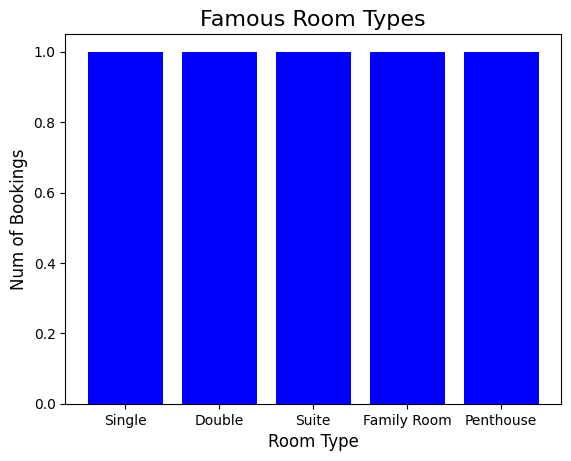

     room_type  bookings
0       Single         1
1       Double         1
2        Suite         1
3  Family Room         1
4    Penthouse         1


In [16]:
import matplotlib.pyplot as plt                 #TODO WENN MÖGLICH DIE DATENBANK MEHR BUCHUNGEN ERGÄNZEN, DAMIT ES MEHR ZU VISUALISIEREN GIBT
import pandas as pd
from business_logic.booking_manager import BookingManager

booking_manager = BookingManager()

# abrufen der Roomtypes aus dem Data_acces layer
famous_roomtype = booking_manager.get_famous_room_type()

df = pd.DataFrame(famous_roomtype)

# Visualisierung in Balkendiagramm
plt.bar(df['room_type'], df['bookings'], color='blue')    # x Werte, y werte

# Diagramm beschriften
plt.title("Famous Room Types", fontsize=16)

# Beschriftung x Achse
plt.xlabel("Room Type", fontsize=12)

# Beschriftung y Achse
plt.ylabel("Num of Bookings", fontsize=12)

plt.show()

print(df.head())
